In [1]:
from load_data import *
import pandas as pd
import numpy as np

from transformers import AutoTokenizer

import pickle

In [2]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

### tokenizer 받아와서 기본 셋팅

In [3]:
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [4]:
# load_data.py 파일 함수들을 이용해 pandas DataFrame으로 만들고 간단한 전처리만 진행된 결과
train_dataset = load_data("../dataset/train/train.csv")
train_dataset.head()

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,'비틀즈','조지 해리슨',no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,'민주평화당','대안신당',no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,'광주FC','한국프로축구연맹',org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,'아성다이소','박정부',org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,'요미우리 자이언츠','1967',no_relation


In [5]:
train_label = label_to_num(train_dataset['label'].values)
train_label[:10]

[0, 0, 20, 1, 0, 5, 0, 25, 7, 6]

### cleaned_text 컬럼 별도 생성

In [6]:
# uni-code 에 맞게 punctuation mapping 하는 함수
def clean_punc(text):
    punct_mapping = {'ʿ': '', 'ū': 'u', 'è': 'e', 'ȳ': 'y', 'ồ': 'o', 'ề': 'e', 'â': 'a', 'æ': 'ae', 'ő': 'o', 'ῶ': 'ω', '𑀕': 'Λ', 'ß': 'β', 'ヶ': 'ケ', '‘': "'", '₹': 'e', '´': "'", '°': '', '€': 'e', '™': 'tm', '√': ' sqrt ', '×': 'x', '²': '2', '—': '-', '–': '-', '’': "'", '_': '-', '`': "'", '“': '"', '”': '"', '£': 'e', '∞': 'infinity', '÷': '/', '•': '.', 'à': 'a', '−': '-', 'Ῥ': 'Ρ', 'ầ': 'a', '́': "'", 'ò': 'o', 'Ö': 'O', 'Š': 'S', 'ệ': 'e', 'Ś': 'S', 'ē': 'e', 'ä': 'a', 'ć': 'c', 'ë': 'e', 'å': 'a', 'Ǧ': 'G', 'ạ': 'a', 'ņ': 'n', 'İ': 'I', 'ğ': 'g', 'ê': 'e', 'Č': 'C', 'ã': 'a', 'ḥ': 'h', 'ả': 'a', 'ễ': 'e', '％': '%', 'ợ': 'o', 'Ú': 'U', 'ư': 'u', 'Ž': 'Z', 'ú': 'u', 'É': 'E', 'Ó': 'O', 'ü': 'u', 'é': 'e', 'ā': 'a', 'š': 's', '𑀥': 'D', 'í': 'i', 'û': 'u', 'ý': 'y', 'ī': 'i', 'ï': 'i', 'ộ': 'o', 'ì': 'i', 'ọ': 'o', 'ş': 's', 'ó': 'o', 'ñ': 'n', 'ậ': 'a', 'Â': 'A', 'ù': 'u', 'ô': 'o', 'ố': 'o', 'Á': 'A', 'ö': 'o', 'ơ': 'o', 'ç': 'c', 'ˈ': "'", 'µ': 'μ', '／': '/', '（': '(', 'ｍ': 'm', '˘': ' ', '𑀫': 'ma', '？': '?', 'ł': 'l', 'Đ': 'D', '：': ':', '･': ',', 'Ç': 'C', 'ı': 'i', '，': ',', '𥘺': '祉', '·': ',', '＇': "'", ' ': ' ', '）': ')', '１': '1', 'ø': 'o', '～': '~', '³': '3', '(˘ ³˘)': '', '˹': '"', '｢': '"', '｣': '"', '«': '<<', '˼': '"', '»': '>>', '®': 'R'}

    for p in punct_mapping:
        text=re.sub(p, punct_mapping[p],text)
        text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\[\]\<\>`\'…《》▲△]', ' ', text)
    return text

In [7]:
train_dataset['cleaned_sent'] = [clean_punc(sent) for sent in train_dataset.sentence]
train_dataset.head()

,id,sentence,subject_entity,object_entity,label,cleaned_sent
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,'비틀즈','조지 해리슨',no_relation,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 Abbey R...
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,'민주평화당','대안신당',no_relation,호남이 기반인 바른미래당 대안신당 민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,'광주FC','한국프로축구연맹',org:member_of,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,'아성다이소','박정부',org:top_members/employees,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,'요미우리 자이언츠','1967',no_relation,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...


### tokenizer 관찰

In [8]:
tokenizer

PreTrainedTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [9]:
print(dir(tokenizer))

['SPECIAL_TOKENS_ATTRIBUTES', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_tokens', '_additional_special_tokens', '_batch_encode_plus', '_bos_token', '_cls_token', '_convert_encoding', '_convert_id_to_token', '_convert_token_to_id_with_added_voc', '_create_or_get_repo', '_decode', '_decode_use_source_tokenizer', '_encode_plus', '_eos_token', '_eventual_warn_about_too_long_sequence', '_from_pretrained', '_get_padding_truncation_strategies', '_get_repo_url_from_name', '_mask_token', '_pad', '_pad_token', '_pad_token_type_id', '_push_to_hub', '_save_pretrained', '_sep_token', '_tokenizer', '_unk_token', 'add_special_tokens', 'add_tokens', 'addition

In [39]:
tokenizer.vocab_size

32000

In [10]:
IDX = 1000
input_sent = train_dataset['sentence'][IDX]
enc_sent = tokenizer.encode(input_sent)
print('-'*10 + ' tokenizer(text) 결과 ' + '-'*10)
print(tokenizer(input_sent))
print('-'*10 + ' tokenizer.tokenize(text) 결과 ' + '-'*10)
print(tokenizer.tokenize(input_sent))
print('-'*10 + ' tokenizer.encode(text) 결과 ' + '-'*10)
print(enc_sent)
# tokenizer.encode(text) == tokenizer(text).input_ids
print('-'*10 + ' tokenizer(encoded_text) 결과 ' + '-'*10)
print(tokenizer.decode(enc_sent))

---------- tokenizer(text) 결과 ----------
{'input_ids': [2, 4748, 2266, 14486, 2155, 2179, 804, 2255, 1160, 2051, 2522, 8702, 2445, 4899, 2146, 21857, 2259, 17284, 2155, 2116, 5597, 2878, 2069, 3896, 2205, 2259, 1898, 2155, 2079, 3951, 2052, 2307, 5862, 2155, 17, 4299, 2079, 4450, 2125, 5230, 2333, 2048, 2170, 8428, 2205, 2118, 1380, 2259, 4683, 6483, 2205, 2507, 2062, 18, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
---------- tokenizer.tokenize(text) 결과 ----------
['이론', '##물', '##리학', '##자', '##인', '닐', '##스', '보', '##어', '##와', '베르', '##너', '하이', '##젠', '##베르크', '##는', '중성', '##자', '##가', '원자', '##핵', '##을', '구성', '##하', '##는', '핵', '##자', '##의', '일부', '##이', 

### train data 약 3만개의 모든 문장 토큰화해서 토큰별 개수 카운팅

In [11]:
def total_tokens(sentences):
    token_counter = {}
    for sent in sentences:
        tokens = tokenizer.tokenize(sent)
        for token in tokens:
            try:
                token_counter[token] += 1
            except:
                token_counter[token] = 1
    return sorted(token_counter.items(), key=lambda x: x[1], reverse=True)

In [12]:
raw_counter = total_tokens(train_dataset['sentence'])

In [13]:
raw_counter[:10]
# [UNK] 개수가 6313

[(',', 37642),
 ('.', 36210),
 ('##의', 34920),
 ('##다', 29480),
 ('##을', 29307),
 ('##에', 25994),
 ('##는', 24825),
 ('##년', 20918),
 ('(', 19211),
 (')', 19190)]

In [14]:
cleaned_counter = total_tokens(train_dataset['sentence'])

In [34]:
sum([value for key, value in cleaned_counter])

1654626

In [38]:
print(cleaned_counter[600:800])
# [UNK] 개수가 동일하게 6313

[('31', 355), ('##피', 355), ('성공', 354), ('체결', 353), ('##익', 352), ('챔피언', 350), ('##메', 350), ('##품', 349), ('[', 349), ('간', 348), ('##빈', 348), ('공화국', 347), ('으로', 346), ('최', 346), ('황제', 346), ('기업', 345), ('올해', 345), ('##K', 345), ('##S', 345), ('##령', 345), ('##임', 344), ('된', 344), ('총선', 344), ('##m', 344), (']', 344), ('S', 343), ('##발전', 342), ('행사', 342), ('자리', 341), ('##슈', 341), ('2015', 341), ('위원장', 340), ('여자', 339), ('약', 338), ('야구', 337), ('##사회', 337), ('##란', 336), ('노', 335), ('##안전', 335), ('호', 335), ('나', 335), ('##e', 334), ('##버', 333), ('임명', 333), ('상황', 332), ('우리', 331), ('H', 331), ('미', 331), ('##정보', 331), ('중심', 331), ('투수', 330), ('이사장', 330), ('##지원', 330), ('##갑', 330), ('##지방', 330), ('##페', 328), ('##o', 327), ('이하', 327), ('잉글랜드', 326), ('로마', 326), ('정책', 325), ('##요', 324), ('##기업', 324), ('총리', 322), ('2004', 322), ('##l', 322), ('##두', 322), ('결혼', 321), ('문화', 321), ('남', 321), ('김대중', 321), ('인사', 321), ('##백', 320), ('##판', 320), ('#

In [16]:
len(raw_counter), len(cleaned_counter)

(24478, 24478)

### 한 번만 등장한 토큰들 따로 추출해서 관찰

In [17]:
raw_unique = [key for key, value in raw_counter if value == 1]
cleaned_unique = [key for key, value in cleaned_counter if value == 1]

In [18]:
len(raw_unique), len(cleaned_unique)

(3345, 3345)

In [19]:
print(cleaned_unique[:50])

['not', '구치소', '태화', '급수', '##든가', '개개', '##선다', '계모', '수렵', '애견', '캠핑', '찬미', '승천', '골반', '##혈관', '미완성', '꿈꿨', '공경', '장애물', '##상스', '미완', '노약자', '##장고', '악영향', '어림', '결석', '십상', '자몽', '##포도', '자두', '낙태', '죄악', '여섯째', 'OE', '맞물', '헤집', '무언', '뚱뚱', '잠옷', '줍', '봉산', '아토', '인양', 'ㆍ조', 'ㆍ정', '##탤', '분향소', '##즙', '자루', '재빠르']


In [20]:
# entity_list = list(train_dataset['subject_entity']) + list(train_dataset['object_entity'])
train_dataset['subject_entity'][0]

" '비틀즈'"

In [21]:
train_dataset['subject_entity'][0][2:-1]

'비틀즈'

### 두 개의 entity 컬럼 추출하여 토큰화 진행

In [22]:
ent_subject = [ent[2:-1] for ent in train_dataset['subject_entity']]
ent_object = [ent[2:-1] for ent in train_dataset['object_entity']]
entity_list = ent_subject + ent_object

In [23]:
# 중복 제거하면 약 7만개 -> 약 2만개로 줄어든다
entity_unique = list(set(entity_list))
entity_list[:10]

['비틀즈',
 '민주평화당',
 '광주FC',
 '아성다이소',
 '요미우리 자이언츠',
 '북대서양 조약 기구',
 'AC 밀란',
 '박용오',
 '중화민국',
 '안규백']

In [24]:
entity_counter = total_tokens(entity_list)
entity_unique = [key for key, value in entity_counter]
len(entity_unique), len(entity_list)

(8874, 64940)

In [25]:
entity_counter[:10]

[('##년', 3382),
 ('##일', 1990),
 ('##당', 1888),
 ('##세', 1850),
 ('##월', 1801),
 ('##스', 1339),
 ('##군', 1170),
 ('##대', 816),
 ('##국', 815),
 ('1', 810)]

In [26]:
entity_unique[:10]

['##년', '##일', '##당', '##세', '##월', '##스', '##군', '##대', '##국', '1']


### sentence에서 추출한 token들 중 한 번만 등장하는 token(==cleaned_unique)과
### entity에서 추출한 token은 몇 종류나 겹칠까?
### -> 적게 등장한 token이 entity에 많이 있는지 관찰하기 위한 작업

In [27]:
def unique_entity_tokens(entity, unique):
    return [ent for ent in entity if ent in unique]

In [28]:
entity_token_unique = unique_entity_tokens(entity_unique, cleaned_unique)
print(len(entity_token_unique))
print(entity_token_unique)

148
['다이오드', '배고픈', '레크', '다이어', '정두언', '김기현', '칼빈', '뽀로로', '##진진', '조바', '스스', '타우', '범어', '포만', '김광석', '##에트', '가재', '##트럼', '식약청', '우동', '치마', '북스', '톨스토이', '퍼시', '김연경', '소연', '아운', '이메', '##뭄', '조윤선', '실러', '##잭', '##튜브', '그자', '머드', '숭실', '라캉', '스팅', '방재', '##나연', '고분', '##캬', '귀여', '모스크', '##코지', '다원', '##대간', '허기', '백설', '엘리엇', '덱', '브러', '렁', '맥아', '서희', '최희', '볼보', '부메', '포티', '난자', '마스카', '##자루', '김황식', '산자', '려', '향료', '손보', '캬', '안종범', '칭기즈칸', '오메가', '뽐', '쁘', '부치', '트렁크', '아만', '라기', '주성', '밍', '박이', '회사원', '호모', '진시황', '순화', '기흥', '엽', '애리', '모세', '양동근', '메트', '박세리', '##상스', '정병국', '깃', '서린', '요미', '##퍽', '##쿠버', '임태희', '울주군', '봅슬레이', '290', '報', '참회', '허상', '##디다', '김영란', 'z', '##쩡', '메커니즘', 'Smart', '단군', '이창호', '##ues', '돈키호테', '##룽지', '클레어', '##고양이', '스노보드', '문진', '##ful', '일병', '##맙', '##outh', '##노위', '239', '051', '##엑', '찍히', '##딩크', '지멘스', '스칼', '하숙', '알카에다', '##높이', '어쩌다', '산수유', '거든', '##icht', '760', '할라', '고칠', '유가증권', '타로', '퇴계', '대감', '##곶', '최하']


1. UNK 어떻게 처리할지
2. 빈도수별 그래프
3. 어떤 class에서 UNK이 많이 등장하는지
4. 어떤 class에서 빈도수 적은 토큰이 많이 등장하는지

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

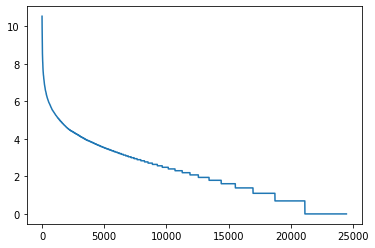

In [30]:
log_freq_tokens = np.log([value for key, value in cleaned_counter])
x_axis = np.arange(len(log_freq_tokens))
plt.plot(x_axis, log_freq_tokens)
plt.show()

In [1]:
import torch

In [2]:
torch.cuda.empty_cache()